In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("D:\GitHub\QishiQR")
import Utils.MajorContract_Offsets
import importlib
importlib.reload(Utils.MajorContract_Offsets)
from Utils.MajorContract_Offsets import *

import Backtesting.Vectorized.lm_validation
importlib.reload(Backtesting.Vectorized.lm_validation)
from Backtesting.Vectorized.lm_validation import LmValidation

importlib.reload(Backtesting.Vectorized.Strategy)
from Backtesting.Vectorized.Strategy import *

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
freq=5
px_th = 0
offset = [0.1+i for i in range(5)]

ag_train, ag_test, ag_probability_table = MajorContracts(symbol='ag', split_time = '2016-7-1', topdir=r'..\\Data',
                                          maturity={'1606':['2015-11-1','2016-5-1'],  
                                                    '1612':['2016-3-1','2016-11-1'],
                                                    '1706':['2016-6-1','2017-1-31']}, 
                                       transitions={'1606':'2016-4-1', 
                                                    '1612':'2016-10-15', 
                                                    '1706':'2017-1-1' },
                                        price='MidPrice',
                                        freq = freq, offset = offset, threshold=px_th).create_major_overlap()

ag1606 ..\\Data/ag
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-04-01 00:00:00
probability table:  20160104 20160331
probability table:  20160104 20160331
probability table:  20160104 20160331
probability table:  20160104 20160331
probability table:  20160104 20160331
ag1612 ..\\Data/ag
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1612 ['2016-3-1', '2016-11-1'] 2016-04-01 00:00:00 2016-10-15 00:00:00
probability table:  20160401.0 20160630.0
probability table:  20160401.0 20160630.0
probability table:  20160401 20160630
probability table:  20160401 20160630
probability table:  20160401 20160630
ag1706 ..\\Data/ag
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1706 ['2016-6-1', '2017-1-31'] 2016-10-15 00:00:00 2016-12-31 00:00:00


In [11]:
for offset in ag_test.keys():
    ag_test[offset].to_csv(r'../Output/ag_major_' + str(freq) + '_th' + str(px_th) + '_' + offset + '.csv')
for contract in ['1606', '1612']:
    ag_probability_table[contract].to_csv(r'../Strategy/ag_'+ contract + '_major_strategy_' + str(freq) + '_th' + str(px_th) + '.csv', index=False)

In [12]:
#ag
filepath = "../Strategy"
#fig = plt.figure()
slm = pd.DataFrame()
for path, dirlist, filelist in os.walk(filepath):
    #print(filelist)
    for filename in fnmatch.filter(filelist, "ag_*_major_strategy_"+str(freq)+"_th"+str(px_th)+".csv"):
        print(filename)
        data = pd.read_csv(os.path.join(path,filename))
        slm = slm.append(data[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index())
slm = slm.groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
slm.to_csv('../Strategy/ag_major_strategy_'+str(freq)+'_th'+str(px_th)+'.csv')
print(slm.head())

ag_1606_major_strategy_5_th0.csv
ag_1612_major_strategy_5_th0.csv
   prior      0      1      2  total signal
0      p  42144  25573  25988  93705      0
1     p0  32686   4751   4706  42143      0
2    p00  30136   1264   1286  32686      0
3   p000  29256    428    452  30136      0
4  p0000  28902    165    189  29256      0


ag_major_5_th0_0.1.csv


C:\Users\Administrator\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


ag_major_5_th0_1.1.csv
ag_major_5_th0_2.1.csv
ag_major_5_th0_3.1.csv
ag_major_5_th0_4.1.csv


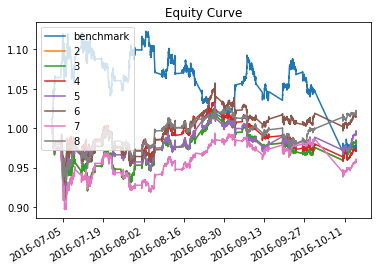

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.229457             -0.000142                -0.001529   
1               0.229457             -0.000142                -0.001529   
2               0.222650             -0.000288                -0.001723   
3               0.230134              0.000005                -0.001808   
4               0.226924              0.000299                -0.001533   
5               0.257912             -0.000445                -0.001554   
6               0.244286              0.000301                -0.001371   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.000843             -3.359970e-06             -0.058872   
1                 0.000843             -3.359970e-06             -0.058872   
2                 0.000870             -8.161630e-06             -0.062588   
3                 0.000911             -4.591940e-07             -0.063383   
4        

In [16]:
slm_th = SLM(slm, 0, th_type=0).run()

lm_validation = LmValidation(slm_th, start='2016-7-1',end='2016-10-15', symbol='ag_major_'+str(freq)+'_'+'th'+str(px_th), data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=5, price='MidPrice', px_th=px_th)
lm_validation.run()

bu_major_5_th0_0.1.csv


C:\Users\Administrator\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


bu_major_5_th0_1.1.csv
bu_major_5_th0_2.1.csv
bu_major_5_th0_3.1.csv
bu_major_5_th0_4.1.csv


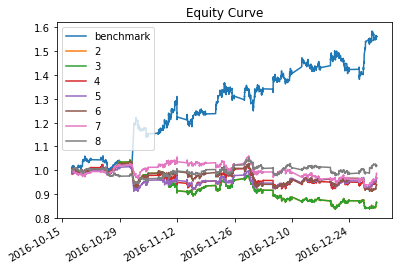

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.515355             -0.002431                -0.004108   
1               0.515355             -0.002431                -0.004108   
2               0.500008             -0.000391                -0.004452   
3               0.478415             -0.000377                -0.004587   
4               0.505846             -0.000969                -0.004051   
5               0.501098             -0.000131                -0.004031   
6               0.497144              0.000443                -0.003595   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.002181                 -0.000080             -0.115116   
1                 0.002181                 -0.000080             -0.115116   
2                 0.002268                 -0.000017             -0.115362   
3                 0.002348                 -0.000016             -0.118142   
4        

In [15]:
slm_th = SLM(slm, 0, th_type=0).run()

lm_validation = LmValidation(slm_th, start='2016-10-16',end='2016-12-31', symbol='bu_major_'+str(freq)+'_'+'th'+str(px_th), data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=5, price='MidPrice', px_th=px_th)
lm_validation.run()

# price threshold = 1

In [17]:
freq=5
px_th = 1
offset = [0.1+i for i in range(5)]

ag_train, ag_test, ag_probability_table = MajorContracts(symbol='ag', split_time = '2016-7-1', topdir=r'..\\Data',
                                          maturity={'1606':['2015-11-1','2016-5-1'],  
                                                    '1612':['2016-3-1','2016-11-1'],
                                                    '1706':['2016-6-1','2017-1-31']}, 
                                       transitions={'1606':'2016-4-1', 
                                                    '1612':'2016-10-15', 
                                                    '1706':'2017-1-1' },
                                        price='MidPrice',
                                        freq = freq, offset = offset, threshold=px_th).create_major_overlap()

ag1606 ..\\Data/ag
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-04-01 00:00:00
probability table:  20160104 20160331
probability table:  20160104 20160331
probability table:  20160104 20160331
probability table:  20160104 20160331
probability table:  20160104 20160331
ag1612 ..\\Data/ag
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1612 ['2016-3-1', '2016-11-1'] 2016-04-01 00:00:00 2016-10-15 00:00:00
probability table:  20160401.0 20160630.0
probability table:  20160401.0 20160630.0
probability table:  20160401 20160630
probability table:  20160401 20160630
probability table:  20160401 20160630
ag1706 ..\\Data/ag
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1706 ['2016-6-1', '2017-1-31'] 2016-10-15 00:00:00 2016-12-31 00:00:00


In [18]:
for offset in ag_test.keys():
    ag_test[offset].to_csv(r'../Output/ag_major_' + str(freq) + '_th' + str(px_th) + '_' + offset + '.csv')
for contract in ['1606', '1612']:
    ag_probability_table[contract].to_csv(r'../Strategy/ag_'+ contract + '_major_strategy_' + str(freq) + '_th' + str(px_th) + '.csv', index=False)

In [19]:
#bu
filepath = "../Strategy"
#fig = plt.figure()
slm = pd.DataFrame()
for path, dirlist, filelist in os.walk(filepath):
    #print(filelist)
    for filename in fnmatch.filter(filelist, "ag_*_major_strategy_"+str(freq)+"_th"+str(px_th)+".csv"):
        print(filename)
        data = pd.read_csv(os.path.join(path,filename))
        slm = slm.append(data[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index())
slm = slm.groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
slm.to_csv('../Strategy/ag_major_strategy_'+str(freq)+'_th'+str(px_th)+'.csv')
print(slm.head())

ag_1606_major_strategy_5_th1.csv
ag_1612_major_strategy_5_th1.csv
   prior      0      1      2  total signal
0      p  63797  14805  15103  93705      0
1     p0  51110   6365   6318  63793      0
2    p00  44345   3313   3451  51109      0
3   p000  40114   2079   2151  44344      0
4  p0000  37293   1389   1432  40114      0


ag_major_5_th1_0.1.csv


C:\Users\Administrator\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


ag_major_5_th1_1.1.csv
ag_major_5_th1_2.1.csv
ag_major_5_th1_3.1.csv
ag_major_5_th1_4.1.csv


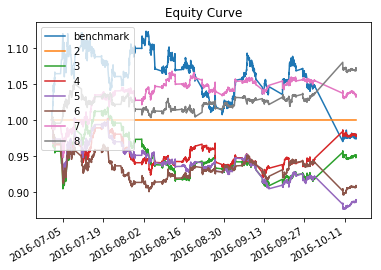

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.000000              0.000000                      NaN   
1               0.253885             -0.000569                -0.004564   
2               0.243592             -0.000215                -0.004512   
3               0.256326             -0.001400                -0.005520   
4               0.254394             -0.001138                -0.004125   
5               0.264469              0.000422                -0.003081   
6               0.247720              0.000881                -0.002488   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                 0.002795                 -0.000090             -0.058164   
2                 0.003002                 -0.000038             -0.058210   
3                 0.003316                 -0.000295             -0.067883   
4        

In [20]:
slm_th = SLM(slm, 0, th_type=0).run()

lm_validation = LmValidation(slm_th, start='2016-7-1',end='2016-10-15', symbol='ag_major_'+str(freq)+'_'+'th'+str(px_th), data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=5, price='MidPrice', px_th=px_th)
lm_validation.run()

In [ ]:
slm_th = SLM(slm, 0, th_type=0).run()

lm_validation = LmValidation(slm_th, start='2016-10-16',end='2016-12-31', symbol='ag_major_'+str(freq)+'_'+'th'+str(px_th), data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=5, price='MidPrice', px_th=px_th)
lm_validation.run()

ag_major_5_th1_0.1.csv


C:\Users\Administrator\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
